In [1]:
import numpy as np
import pandas as pd
import pickle
import psutil
import random as rn
import tensorflow as tf
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [2]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, History 
from keras import backend as K

Using TensorFlow backend.


In [3]:
with open('lime_analysis_data/complete_data.pkl', 'rb') as handle:
    complete_data = pickle.load(handle)

In [4]:
with open('lime_analysis_data/results.pkl', 'rb') as handle:
    lime_dict = pickle.load(handle)

In [5]:
x_train = complete_data['xtrain']
x_test = complete_data['xtest']
x_val = complete_data['xval']
y_train = complete_data['ytrain']
y_test = complete_data['ytest']
y_val = complete_data['yval']
# param_dict = complete_data['params_dict']

# Analysis of Local Right df

In [6]:
right_local_df = lime_dict['right_local_pred_df'].copy()

In [7]:
right_local_df_trans = right_local_df.T.copy()

In [8]:
right_local_df_trans['y_actual'] = y_val.reset_index(drop=True)

In [9]:
right_local_df_trans['right_actual'] = abs((right_local_df_trans.right - right_local_df_trans.y_actual)/right_local_df_trans.y_actual) * 100

In [10]:
# right_local_df_trans.sort_values(by=['right_actual'],ascending=False,inplace=True)

In [11]:
import matplotlib.pyplot as plt

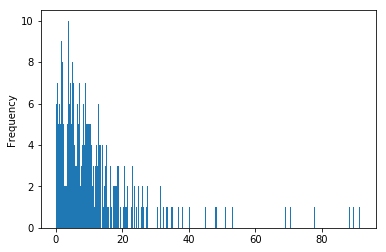

In [12]:
right_local_df_trans['right_actual'].plot.hist(bins = 290)
plt.show()

In [1]:
right_local_df_trans_subset = right_local_df_trans[right_local_df_trans.right_actual<=10]

NameError: name 'right_actual_df' is not defined

In [14]:
# right_local_df_trans_top_n = right_local_df_trans.iloc[:int(np.ceil(right_local_df_trans.shape[0]*0.05)),:]

# Analysis of Intensity df

In [15]:
intensity_df = lime_dict['intensity_df'].copy()

In [16]:
header = intensity_df.iloc[0]
intensity_df = intensity_df[1:]
intensity_df.columns = header

In [17]:
intensity_df.reset_index(drop=True,inplace=True)

In [18]:
intensity_df_subset = intensity_df.loc[list(right_local_df_trans_subset.index),:]

In [19]:
intensity_df_subset_trans = intensity_df_subset.T

In [20]:
intensity_df_subset_trans['sum_of_intensities'] = intensity_df_subset_trans.abs().sum(axis=1)

In [21]:
intensity_df_subset_trans.sort_values(by=['sum_of_intensities'],ascending=False,inplace=True)

In [22]:
intensity_df_subset_trans

,3,4,5,9,10,14,15,18,21,22,...,270,272,274,275,277,283,284,285,288,sum_of_intensities
feature_name,,,,,,,,,,,,,,,,,,,,,
BsmtFinSF1,2977.94,4001.41,44895.5,2583.5,-34439.4,3310.92,3217.5,-15408.3,-32933.4,-15541,...,-33160,-31928.6,-32962.3,-16926.7,-34131.2,44643.6,4514.2,-32929.7,-12896.5,4.498249e+06
2ndFlrSF,-27827.8,6798.15,-27557.6,27566.6,9473.77,-27335.5,-26235.6,29545.6,-28921.1,-27595.1,...,-26448.4,9123.95,-27446.8,8430.6,-26802.7,7741.26,-25013.8,30667.6,6355.15,3.956725e+06
3SsnPorch,-16897.6,-18370.8,-12261.9,-11627.5,-12749,-9158.52,-16628,-17692.2,-13908.6,-14629.8,...,-7234.4,-15080.3,-15514.6,-13732.8,-12418.1,-16377.6,-25085.5,-14751.2,-15390.2,2.430540e+06
BsmtUnfSF,1837.28,-16698.9,-19086.1,-9236.02,-9793.59,-9463.06,-9277.11,1514.76,26781.9,684.237,...,27806.4,-7.44729,27881.2,-8648.74,25952.5,-17617,669.965,28369.9,-19544.9,2.420016e+06
GarageArea,-6609.84,-5538.7,-17478,19692.9,-3751.92,-16953.3,-18869.4,-3989.91,19664.4,-17726.9,...,19984.2,-18361.7,-18476.5,-17864.1,20915,-4382.1,2286.77,19475.1,20690.1,2.175302e+06
MiscVal,15483.8,14492,13921.7,14269.1,-14489.2,7550.11,14213.6,13631.4,13513.5,8403.79,...,8819.52,13731,9184.15,16859.6,14348.4,10064.4,13691.7,10132.9,10014,2.152596e+06
GrLivArea,-7807.82,3992.06,-19848.7,2148.52,3003.94,-19843.7,-19827,1537.24,2034.72,-19763.2,...,-8550.26,-7830.11,-18996.6,-8746.06,-8033.09,895.921,-8121.55,25881,-8787.16,2.075209e+06
GarageYrBlt_1937.0,-9916.44,2745.83,-1981.35,5962.01,12783.6,8750.03,14339.5,7397.05,-11814.2,-16360.2,...,-2386.71,9353.28,-760.864,21319.5,-10592.8,6240.23,15942.5,-6232.6,-18614.5,1.792836e+06
Functional_Sev,5095.08,13708.7,-3839.44,-5390.81,-32347,-5436.75,4444.58,-269.567,-13816.1,-28083.2,...,2338.98,-7495.32,14207.3,12058.9,-24022.7,11891.4,-28087.7,6157.74,-21608.9,1.738523e+06


# List of columns dict

In [23]:
list_of_cols_subset = {}

# Drop 0 intensities

In [25]:
intensity_df_subset_trans_0 = intensity_df_subset_trans.copy()

In [26]:
intensity_df_subset_trans_0 = intensity_df_subset_trans_0.loc[(intensity_df_subset_trans_0!=0).any(axis=1)]

In [27]:
list_of_cols_subset['drop_0_columns'] = list(intensity_df_subset_trans_0.index)

# Drop last n%

In [25]:
intensity_df_subset_trans_n = intensity_df_subset_trans.copy()

In [ ]:
# for n in range(1,41):
#     list_of_cols_subset['drop_{}_pct_columns'.format(n)] = list(intensity_df_subset_trans_n.iloc[:int(np.ceil(intensity_df_subset_trans_n.shape[0] * (1-(n/100)))),:].index)

In [26]:
for n in range(17,41):
    list_of_cols_subset['drop_{}_pct_columns'.format(n)] = list(intensity_df_subset_trans_n.iloc[:int(np.ceil(intensity_df_subset_trans_n.shape[0] * (1-(n/100)))),:].index)

# Drop None

In [27]:
list_of_cols_subset['drop_none'] = list(intensity_df_subset_trans.index)

In [28]:
list_of_cols_subset.keys()

dict_keys(['drop_17_pct_columns', 'drop_18_pct_columns', 'drop_19_pct_columns', 'drop_20_pct_columns', 'drop_21_pct_columns', 'drop_22_pct_columns', 'drop_23_pct_columns', 'drop_24_pct_columns', 'drop_25_pct_columns', 'drop_26_pct_columns', 'drop_27_pct_columns', 'drop_28_pct_columns', 'drop_29_pct_columns', 'drop_30_pct_columns', 'drop_31_pct_columns', 'drop_32_pct_columns', 'drop_33_pct_columns', 'drop_34_pct_columns', 'drop_35_pct_columns', 'drop_36_pct_columns', 'drop_37_pct_columns', 'drop_38_pct_columns', 'drop_39_pct_columns', 'drop_40_pct_columns', 'drop_none'])

# Training with selected columns

In [29]:
# Model Training
def get_search_space():    
    space = {'num_layers': hp.choice('num_layers',['one_hidden', 'two_hidden']),
                'units1': hp.choice('units1', [32, 64, 128, 256,512]),
                'units2': hp.choice('units2', [32, 64, 128, 256,512]),
                'dropout1': hp.uniform('dropout1', .25,.75),
                'dropout2': hp.uniform('dropout2',  .25,.75),
                'batch_size' : hp.choice('batch_size', [16,32,64,128]),
                'nb_epochs' :  500,
                'optimizer': hp.choice('optimizer',['rmsprop', 'adam', 'nadam','sgd']),
                'activation': hp.choice('activation',['relu','sigmoid']),
                'early_stop_rounds': hp.choice('early_stop_rounds',[10,20,30,40,50]),
            }
    return space

In [30]:
def create_model(params):    
#     x_train_temp = x_train.copy()
#     x_test_temp = x_test.copy()
#     y_train_temp = y_train.copy()
#     y_test_temp = y_test.copy()
    model = Sequential()
    model.add(Dense(params['units1'], input_shape=(x_train_temp.shape[1],)))
    model.add(Activation(params['activation']))
    model.add(Dropout(params['dropout1']))
    if(params['num_layers'] == 'two_hidden'):
        model.add(Dense(params['units2']))
        model.add(Activation(params['activation']))
        model.add(Dropout(params['dropout2']))
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile(loss='mse', metrics=['mse'],
                  optimizer=params['optimizer'])
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=params['early_stop_rounds'])
    history = History()
    model.fit(x_train_temp, y_train_temp,
              batch_size=params['batch_size'],
              epochs=500,
              callbacks=[early_stop, history],
              verbose=0,
              validation_data=(x_valid_temp,y_valid_temp)) 
    [loss, mse] = model.evaluate(x_valid_temp,y_valid_temp, verbose=0)
    global num
    mem = psutil.virtual_memory()
    if(np.isnan(mse)):
        print("{}) Validation set root mean sq. error: NaN".format(num),"\tAvailable Mem:",(mem.available/1024)/1024,"mb")
        num = num + 1
        return {'loss': np.inf, 'status': STATUS_OK, 'model': model,'params':params}
    print("{}) Validation set root mean sq. error: {:7.2f}".format(num,mse**0.5),"\tAvailable Mem:",(mem.available/1024)/1024,"mb")
    num = num + 1
    return {'loss': loss**0.5, 'status': STATUS_OK, 'model': model, 'params':params}

In [31]:
label_col = 'SalePrice'

In [32]:
def get_best_model(label_col):
#     global x_train, x_test, x_valid, y_train, y_test, y_valid
#     input_df, x_train, x_test, x_valid, y_train, y_test, y_valid = data(csv_name=csv_name,label_col=label_col,num_features=num_features)
    trials=Trials()
    space = get_search_space()
    print("Selecting the best network architecture specifically for your data...")
    best = fmin(create_model, space, algo=tpe.suggest, max_evals=50, trials=trials)
    best_model = trials.best_trial['result']['model']
#     scaled_feature_df = pd.concat([x_train,x_test])
#     label_df = pd.concat([y_train,y_test])
#     pred_df = make_predictions(model=best_model,df=scaled_feature_df)
#     output_df = pd.merge(input_df,pred_df['predictions'].to_frame(),left_index=True,right_index=True)
    return best_model, trials

In [34]:
import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

resultant_dict = {}
num =1 
for n,(key,cols) in enumerate(list_of_cols_subset.items()):
    print(n,key,len(cols))
    global x_train_temp,y_train_temp,x_valid_temp,y_valid_temp, x_test_temp, y_test_temp
    x_train_temp = x_train[cols].copy()
    y_train_temp = y_train.copy()
    x_valid_temp = x_val[cols].copy()
    y_valid_temp = y_val.copy()
    x_test_temp = x_test[cols].copy()
    y_test_temp = y_test.copy()
#     result_model = create_model(x_train_temp,y_train_temp,x_valid_temp,y_valid_temp,param_dict)
    best_model, output_trials = get_best_model(label_col)
    val_rmse = best_model.evaluate(x_valid_temp,y_valid_temp,verbose=0)[0] ** 0.5
    test_rmse = best_model.evaluate(x_test_temp,y_test_temp,verbose=0)[0] ** 0.5
    resultant_dict['{}'.format(key)] = [val_rmse,test_rmse]
    result_lime_analysis_2_param_opt = pd.DataFrame(resultant_dict).T
    result_lime_analysis_2_param_opt.columns = ['valid_rmse','test_rmse']
    result_lime_analysis_2_param_opt.to_csv('lime_analysis_data/result_lime_analysis_2_param_opt_17-40-corrected.csv')

0 drop_17_pct_columns 329
Selecting the best network architecture specifically for your data...
1) Validation set root mean sq. error: 202005.11 	Available Mem: 18478.9609375 mb
2) Validation set root mean sq. error: 202022.29 	Available Mem: 18466.3671875 mb
3) Validation set root mean sq. error: 90494.10 	Available Mem: 18458.62109375 mb
4) Validation set root mean sq. error: 45594.90 	Available Mem: 18445.91015625 mb
5) Validation set root mean sq. error: 195485.30 	Available Mem: 18436.0859375 mb
6) Validation set root mean sq. error: NaN 	Available Mem: 18428.82421875 mb
7) Validation set root mean sq. error: 42737.49 	Available Mem: 18415.62890625 mb
8) Validation set root mean sq. error: NaN 	Available Mem: 18408.62109375 mb
9) Validation set root mean sq. error: 203073.84 	Available Mem: 18396.6328125 mb
10) Validation set root mean sq. error: 42392.35 	Available Mem: 18384.46484375 mb
11) Validation set root mean sq. error: 43536.74 	Available Mem: 18371.15234375 mb
12) Valida

99) Validation set root mean sq. error: NaN 	Available Mem: 17447.4296875 mb
100) Validation set root mean sq. error: 45185.00 	Available Mem: 17434.34765625 mb
2 drop_19_pct_columns 321
Selecting the best network architecture specifically for your data...
101) Validation set root mean sq. error: 82481.68 	Available Mem: 17424.8203125 mb
102) Validation set root mean sq. error: 73816.76 	Available Mem: 17420.12890625 mb
103) Validation set root mean sq. error: 87104.00 	Available Mem: 17409.8984375 mb
104) Validation set root mean sq. error: 49908.19 	Available Mem: 17398.53125 mb
105) Validation set root mean sq. error: 40546.39 	Available Mem: 17387.73046875 mb
106) Validation set root mean sq. error: 202107.77 	Available Mem: 17382.71875 mb
107) Validation set root mean sq. error: 50642.18 	Available Mem: 17371.02734375 mb
108) Validation set root mean sq. error: 46375.50 	Available Mem: 17356.6171875 mb
109) Validation set root mean sq. error: NaN 	Available Mem: 17346.3828125 mb
1

196) Validation set root mean sq. error: NaN 	Available Mem: 16447.66796875 mb
197) Validation set root mean sq. error: 202653.95 	Available Mem: 16444.5546875 mb
198) Validation set root mean sq. error: 44994.47 	Available Mem: 16425.29296875 mb
199) Validation set root mean sq. error: 200453.96 	Available Mem: 16419.81640625 mb
200) Validation set root mean sq. error: 43420.80 	Available Mem: 16401.40234375 mb
4 drop_21_pct_columns 313
Selecting the best network architecture specifically for your data...
201) Validation set root mean sq. error: 44704.42 	Available Mem: 16397.29296875 mb
202) Validation set root mean sq. error: NaN 	Available Mem: 16392.74609375 mb
203) Validation set root mean sq. error: 197652.42 	Available Mem: 16375.89453125 mb
204) Validation set root mean sq. error: NaN 	Available Mem: 16372.31640625 mb
205) Validation set root mean sq. error: 202048.16 	Available Mem: 16367.84375 mb
206) Validation set root mean sq. error: 203473.78 	Available Mem: 16347.535156

293) Validation set root mean sq. error: 38274.97 	Available Mem: 15430.86328125 mb
294) Validation set root mean sq. error: NaN 	Available Mem: 15427.2421875 mb
295) Validation set root mean sq. error: 59281.58 	Available Mem: 15422.40625 mb
296) Validation set root mean sq. error: NaN 	Available Mem: 15398.66796875 mb
297) Validation set root mean sq. error: 48570.63 	Available Mem: 15393.35546875 mb
298) Validation set root mean sq. error: 43385.88 	Available Mem: 15368.22265625 mb
299) Validation set root mean sq. error: 203039.29 	Available Mem: 15363.90234375 mb
300) Validation set root mean sq. error: NaN 	Available Mem: 15360.546875 mb
6 drop_23_pct_columns 305
Selecting the best network architecture specifically for your data...
301) Validation set root mean sq. error: 43478.73 	Available Mem: 15336.390625 mb
302) Validation set root mean sq. error: 44929.65 	Available Mem: 15332.44921875 mb
303) Validation set root mean sq. error: 203591.88 	Available Mem: 15329.83203125 mb
3

390) Validation set root mean sq. error: 39619.22 	Available Mem: 14275.2109375 mb
391) Validation set root mean sq. error: 42174.04 	Available Mem: 14244.35546875 mb
392) Validation set root mean sq. error: 41903.72 	Available Mem: 14236.91796875 mb
393) Validation set root mean sq. error: 203386.62 	Available Mem: 14206.39453125 mb
394) Validation set root mean sq. error: 44337.44 	Available Mem: 14200.7109375 mb
395) Validation set root mean sq. error: 201517.20 	Available Mem: 14169.38671875 mb
396) Validation set root mean sq. error: NaN 	Available Mem: 14165.890625 mb
397) Validation set root mean sq. error: 202375.83 	Available Mem: 14158.3359375 mb
398) Validation set root mean sq. error: 48933.10 	Available Mem: 14126.96875 mb
399) Validation set root mean sq. error: NaN 	Available Mem: 14123.07421875 mb
400) Validation set root mean sq. error: 203129.73 	Available Mem: 14092.7109375 mb
8 drop_25_pct_columns 297
Selecting the best network architecture specifically for your dat

487) Validation set root mean sq. error: 201363.88 	Available Mem: 12826.83984375 mb
488) Validation set root mean sq. error: 45908.42 	Available Mem: 12822.80078125 mb
489) Validation set root mean sq. error: 42417.79 	Available Mem: 12788.875 mb
490) Validation set root mean sq. error: 199792.97 	Available Mem: 12784.4296875 mb
491) Validation set root mean sq. error: 45115.63 	Available Mem: 12748.8046875 mb
492) Validation set root mean sq. error: NaN 	Available Mem: 12744.265625 mb
493) Validation set root mean sq. error: 194160.40 	Available Mem: 12738.46875 mb
494) Validation set root mean sq. error: 44053.61 	Available Mem: 12704.20703125 mb
495) Validation set root mean sq. error: NaN 	Available Mem: 12700.76953125 mb
496) Validation set root mean sq. error: 202487.74 	Available Mem: 12696.0234375 mb
497) Validation set root mean sq. error: 43438.43 	Available Mem: 12660.5625 mb
498) Validation set root mean sq. error: NaN 	Available Mem: 12656.34375 mb
499) Validation set roo

KeyboardInterrupt: 

In [47]:
resultant_dict

{'drop_0_columns': [30404.338886370173, 25088.593289324002],
 'drop_10_pct_columns': [33614.15319895414, 27312.142264047074],
 'drop_11_pct_columns': [33996.761423041055, 27717.11101015293],
 'drop_12_pct_columns': [32965.77000465786, 26775.384902434915],
 'drop_13_pct_columns': [32195.169562721887, 25856.82617934244],
 'drop_14_pct_columns': [33205.293640290714, 31346.555642572934],
 'drop_15_pct_columns': [31352.11639119274, 27208.162252178914],
 'drop_16_pct_columns': [38790.45343629156, 34227.339805454874],
 'drop_1_pct_columns': [32746.81581530301, 26041.753331209744],
 'drop_2_pct_columns': [31989.221972839325, 27428.334694936493],
 'drop_3_pct_columns': [32214.880097503883, 27748.421507627212],
 'drop_4_pct_columns': [30092.675405292164, 24903.079532997603],
 'drop_5_pct_columns': [33934.3148551677, 29022.00700144207],
 'drop_6_pct_columns': [35384.801679583405, 30634.638117514383],
 'drop_7_pct_columns': [30816.73189502182, 26124.21767098418],
 'drop_8_pct_columns': [38453.7855